In [125]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import cv2
%matplotlib inline

In [126]:
# TRAIN_DATA_PATH = "asl"

# NUM_OF_LETTERS = 26 # "A" to "Z" 
# IMAGE_SIZE = 50 #We'll be workign with 50 * 50 pixel images
# NUM_OF_CHANNELS = 1 # Grayscale
# NUM_OF_DENSE_LAYER_NODES = (IMAGE_SIZE * IMAGE_SIZE) // 2

# LABELS = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
#         'n','o', 'p', 'q','r', 's', 't','u', 'v', 'w', 'x', 'y', 'z']

TRAIN_DATA_PATH = "asl_test_12"

# NUM_OF_LETTERS = 12 # "A" to "Z" 
NUM_OF_LETTERS = 11 # "A" to "Z" 
IMAGE_SIZE = 50 #We'll be workign with 50 * 50 pixel images
NUM_OF_CHANNELS = 1 # Grayscale
NUM_OF_DENSE_LAYER_NODES = (IMAGE_SIZE * IMAGE_SIZE) // 2
# LABELS = ['B','T','TH']
LABELS = ['A','AIN','B','D','DAD','GH','L','R','S','T','Y']
print(len(LABELS))

11


In [127]:
#appending image of each type in list
y_unique = []
x_unique = []
for alphabet in os.listdir(TRAIN_DATA_PATH):
    for image in os.listdir(TRAIN_DATA_PATH+str('\\')+alphabet):
        X=imread(TRAIN_DATA_PATH+str('\\')+alphabet+str('\\')+image)
        x_unique.append(X)
        y_unique.append(alphabet)
        break

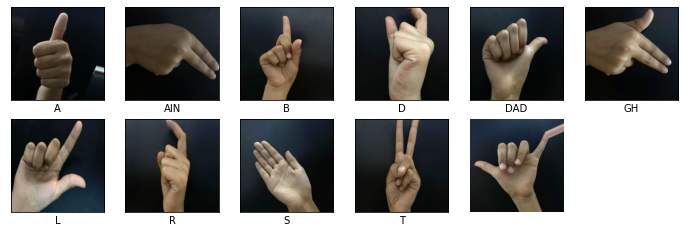

In [128]:
fig=plt.figure(figsize=(12,12))
for i in range(len(x_unique)):
    ax=fig.add_subplot(6,6,i+1)
    ax.imshow(x_unique[i])
    plt.xlabel(y_unique[i])
    plt.xticks([])
    plt.yticks([])
plt.axis('off')
plt.show()
fig.savefig('alphabet')

In [129]:
def create_data(DATA_PATH):
    x=[]
    y=[]
    paths=[]
    for label in LABELS:
        path = os.path.join(DATA_PATH, label)
        label_name = LABELS.index(label)
        for img in os.listdir(path):
            p=os.path.join(path, img)
            paths.append(p)
            print(p)
            try:
                img_array = cv2.imread(p)#os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                x.append(img_array)
                y.append(label_name)
            except Exception as e:
                pass
    return x,y

X_train, y_train= create_data(TRAIN_DATA_PATH)


asl_test_12\A\A_0_1051.jpeg
asl_test_12\A\A_0_106.jpeg
asl_test_12\A\A_0_1102.jpeg
asl_test_12\A\A_0_1105.jpeg
asl_test_12\A\A_0_1109.jpeg
asl_test_12\A\A_0_1209.jpeg
asl_test_12\A\A_0_1258.jpeg
asl_test_12\A\A_0_1288.jpeg
asl_test_12\A\A_0_1304.jpeg
asl_test_12\A\A_0_1402.jpeg
asl_test_12\A\A_0_1440.jpeg
asl_test_12\A\A_0_1504.jpeg
asl_test_12\A\A_0_153.jpeg
asl_test_12\A\A_0_1582.jpeg
asl_test_12\A\A_0_1606.jpeg
asl_test_12\A\A_0_1774.jpeg
asl_test_12\A\A_0_1777.jpeg
asl_test_12\A\A_0_1802.jpeg
asl_test_12\A\A_0_1830.jpeg
asl_test_12\A\A_0_1849.jpeg
asl_test_12\A\A_0_1950.jpeg
asl_test_12\A\A_0_2082.jpeg
asl_test_12\A\A_0_2219.jpeg
asl_test_12\A\A_0_2239.jpeg
asl_test_12\A\A_0_2240.jpeg
asl_test_12\A\A_0_2271.jpeg
asl_test_12\A\A_0_2347.jpeg
asl_test_12\A\A_0_2349.jpeg
asl_test_12\A\A_0_235.jpeg
asl_test_12\A\A_0_2438.jpeg
asl_test_12\A\A_0_2625.jpeg
asl_test_12\A\A_0_2645.jpeg
asl_test_12\A\A_0_2687.jpeg
asl_test_12\A\A_0_2714.jpeg
asl_test_12\A\A_0_2736.jpeg
asl_test_12\A\A_0_2822.

In [130]:
NUM_OF_TRAIN_IMAGES = len(X_train)
print(len(X_train))

1741


In [131]:
X_train=np.array(X_train)

In [132]:
X_train = X_train.reshape(NUM_OF_TRAIN_IMAGES, IMAGE_SIZE , IMAGE_SIZE, NUM_OF_CHANNELS)
print(X_train.shape)

(1741, 50, 50, 1)


In [133]:
X_train = X_train.astype("float32")
X_train /= 255.0


In [134]:
y_train = to_categorical(y_train, NUM_OF_LETTERS)
print(X_train.shape)


(1741, 50, 50, 1)


In [135]:
#Saving Data
np.save("X_train_test.npy", X_train)
np.save("y_train_test.npy", y_train)

In [136]:
X_train=np.load("X_train_test.npy")
y_train=np.load("y_train_test.npy")

# Creating CNN Model

In [137]:
model = Sequential()

model.add(Conv2D(IMAGE_SIZE, (3, 3), padding = "same", input_shape = (IMAGE_SIZE, IMAGE_SIZE, NUM_OF_CHANNELS), activation = "relu"))
model.add(Conv2D(IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(NUM_OF_DENSE_LAYER_NODES, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_OF_LETTERS, activation = "softmax"))

# Compiling CNN Model

In [138]:
model.compile(
    optimizer = "adam", 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy"]
)

In [139]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 50, 50, 50)        500       
                                                                 
 conv2d_29 (Conv2D)          (None, 48, 48, 50)        22550     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 24, 24, 50)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 24, 24, 50)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 100)       45100     
                                                                 
 conv2d_31 (Conv2D)          (None, 22, 22, 100)       90100     
                                                      

# Training Model

In [140]:
history = model.fit(
    X_train, 
    y_train, 
    batch_size = 52,
    epochs = 5,
    shuffle = True
)

Epoch 1/5
34/34 [==============================] - 16s 440ms/step - loss: 1.6365 - accuracy: 0.4118
Epoch 2/5
34/34 [==============================] - 19s 551ms/step - loss: 0.4084 - accuracy: 0.8639
Epoch 3/5
34/34 [==============================] - 19s 548ms/step - loss: 0.1085 - accuracy: 0.9638
Epoch 4/5
34/34 [==============================] - 19s 565ms/step - loss: 0.0596 - accuracy: 0.9787
Epoch 5/5
34/34 [==============================] - 19s 568ms/step - loss: 0.0383 - accuracy: 0.9902


# Saving Model for future use

In [141]:
#Saving Model
from keras.models import load_model
model.save('model_test.h5') 